# GA Based DG to Facility Assignment Optimization Tests

In [1]:
from _products.visualization_tools import *
from _products.utility_fnc import blocking_sound_player as bsp, error_sounds as err_snd, Alert_sounds as alrt_snd
from _LearningMachines._BIO._GA.GA_TOOLS4 import *


# these need to be the paths to the data files for the various agents in the model
DG_FILES = r'DataFiles/dg.csv'
budget = r'DataFiles/budget.csv'
Distances = r'DataFiles/Distance of DG to Building .csv'
facilities = r'DataFiles/nodes2.csv'

# store the scores for a given generational biase
hp_dict = {}

In [2]:
dum_l = [np.zeros(5)]

print(dum_l)
test_dmd = np.array([1, 3, 44, 5, 100])
dum_l[0][3] = 1

print(dum_l)

print(sum(dum_l[0]*test_dmd))

[array([0., 0., 0., 0., 0.])]
[array([0., 0., 0., 1., 0.])]
5.0


# total investment cost for a given solution: Must not exceed budget

![Investment cost Equation](_Media_/_INFORMATION/_IMG/eqn1.png)

In [3]:
 base_budgets = pd.DataFrame({
        'id': [1, 2, 3, 4],
        "budget": [1000000,5000000,10000000,15000000],
    })

sample_dg = pd.DataFrame({
    'id': [1, 2, 3, 4, 5],
    "cost":[5, 5, 1, 10, 2],
    "output":[230, 1222, 123, 300, 600],
    "opmain":[3, 10, 1, 5, 9], 
    "capacity": [300, 1222, 200, 400, 900]})

sample_node = pd.DataFrame({
    "demand":[5, 5, 1, 10, 2],
    "penalty":[230, 1222, 123, 300, 600],
    })

distances = [
    [2000, 100, 230, 3009, 1234],
    [123, 90, 234, 1233, 890],
    [122, 600, 789, 9009, 100],
    [1232, 45, 6790, 234, 7878],
    [1233, 456, 6768, 9088, 1230]]



chromo = np.array([0, 1, 1, 0, 1])

n_desired = 4
n_chrom = np.count_nonzero(chromo)

n_count_error = abs(n_desired - n_chrom)
print(n_chrom)
print(n_count_error)

inv_cost = sample_dg['cost'].values * sample_dg['output'].values
print("investment cost")
display(inv_cost)

print("dot")
print(np.dot(inv_cost, chromo.T))

# use only one excess factor
# use rated_power

3
1
investment cost


array([1150, 6110,  123, 3000, 1200], dtype=int64)

dot
7433


# Operation and Maintenance cost

![Operation and Maintenance cost](_Media_/_INFORMATION/_IMG/eqn2_ops_maint.png)
<br>
![Operation and Maintenance variables](_Media_/_INFORMATION/_IMG/opmaint_vars.png)

In [4]:
# base operation need to only get product for a node corresponding to assignement
# First do assignment loging which nodes go to which open DG
# the use logged assignments to calculte total demand for that node
#       1) keep assignments as a boolean list list as well
#             :-> dg_j == [0, 0, 0, 1,.......]
#                             0 = not assignmed
#                             1 = assigned


# add global unmet demands

assignments = [False, False, True, False, True]
chh =[x==1 for x in chromo] 

print("chh")
print(chh)
a = sample_dg.loc[chh, 'opmain'].values

c = sample_node.loc[assignments, :]

b = sample_node.loc[assignments, :]['demand'].values
# select all DGs that are open using chromosome


print(a)
print(b)

# opmain_current_assign = a * b
# print(opmain_current_assign)
# total_opmain_out = np.dot(opmain_current_assign, chromo.T)
# print("Total operationcost")
# print(total_opmain_out)

chh
[False, True, True, False, True]
[10  1  9]
[1 2]


# Distance of distribution cost


![Distance cost](_Media_/_INFORMATION/_IMG/eqn_3distance.png)

# minimizes the total network power outage (unmet demand) during a large-scale grid disturbance:
![unmet demand](_Media_/_INFORMATION/_IMG/eqn4_unmetdamand.png)


# Excess Power 


![Excess power penalty](_Media_/_INFORMATION/_IMG/ExcessPF.png)
![unmet demand](_Media_/_INFORMATION/_IMG/EXCESSPF_para.png)

# MOCK Assignment

![mock_model](_Media_/_INFORMATION/_IMG/MOC_MODEL.png)

# My additional scoring methods:

> Added a penalty for how off the budget is. The score gets increased if the investment cost for that assignment is over budget
> Score is decrease when the assignment is under budget

 + (assignment_investment_cost - Budget)*factor
 
> Added a penalty for when there are more than the desired number of "on" DGs

> 

# Below is just to have a look at some of the data from the dg file

#  mitigate the potential RPF issue by minimizing the amount of excess renewable penetration (RPF amounts) experienced within the network

In [5]:
DG_df = pd.read_csv(DG_FILES)

display(DG_df.head())

for v in DG_df.columns.tolist():
    print("'{}',".format(v))

,id,output,pos-x,pos-y,rated_power,investment_cost,o&m_cost,excess_penetration_cost_LOW,excess_penetration_cost_MEDIUM,excess_penetration_cost_HIGH
0,1.0,1351248.0,35.953747,-83.943975,5000000.0,1.36,0.041,0.68,1.36,2.04
1,2.0,1351248.0,35.967477,-83.937751,5000000.0,1.36,0.041,0.68,1.36,2.04
2,3.0,1351248.0,36.062503,-83.996649,5000000.0,1.36,0.041,0.68,1.36,2.04
3,4.0,1351248.0,35.975097,-83.936355,5000000.0,1.36,0.041,0.68,1.36,2.04
4,5.0,1351248.0,35.968580,-83.993414,5000000.0,1.36,0.041,0.68,1.36,2.04


'id',
'output',
'pos-x',
'pos-y',
'rated_power',
'investment_cost',
'o&m_cost',
'excess_penetration_cost_LOW',
'excess_penetration_cost_MEDIUM',
'excess_penetration_cost_HIGH',


In [6]:
DGdist_df = pd.read_csv(Distances)

# display(DGdist_df.loc[].head())

for v in DGdist_df.columns.tolist():
    print("'{}',".format(v))

'demand_node',
'dg-1',
'dg-2',
'dg-3',
'dg-4',
'dg-5',
'dg-6',
'dg-7',
'dg-8',
'dg-9',
'dg-10',
'dg-11',
'dg-12',
'dg-13',
'dg-14',
'dg-15',
'dg-16',
'dg-17',
'dg-18',
'dg-19',
'dg-20',
'dg-21',
'dg-22',
'dg-23',
'dg-24',
'dg-25',


# Below is just to have a look at some of the data from the facility file

In [7]:
facility_df = pd.read_csv(facilities)
display(facility_df)
Penalty_options = sorted(pd.read_csv(facilities)['penalty'].unique())
print(Penalty_options)

# add global 


,id,demand,penalty,pos-x,pos-y,low,medium,high,type
0,1,495434,10,35.953747,-83.943975,1.0,5.0,10,Hospital
1,2,495434,10,35.967477,-83.937751,1.0,5.0,10,Hospital
2,3,495434,10,36.062503,-83.996649,1.0,5.0,10,Hospital
3,4,495434,10,35.975097,-83.936355,1.0,5.0,10,Hospital
4,5,495434,10,35.968580,-83.993414,1.0,5.0,10,Hospital
5,6,18031,5,35.984883,-83.903327,0.5,2.5,5,FireStation
6,7,18031,5,35.986606,-83.932197,0.5,2.5,5,FireStation
7,8,18031,5,35.992759,-83.952804,0.5,2.5,5,FireStation
8,9,18031,5,35.991716,-84.001613,0.5,2.5,5,FireStation
9,10,18031,5,35.935312,-83.869820,0.5,2.5,5,FireStation


[3, 5, 7, 10]


# Budget

* add budget storage
* incorporate the budget into cost solver for dg
* use to set threshold for DG costs
    - Total

In [8]:
display(pd.read_csv(budget))



,id,budget
0,1,0
1,2,1000000
2,3,5000000
3,4,10000000
4,5,15000000


In [9]:




# slight mutation bias, small offspring over best-copy bias
# score: 
# pm = .05                 # probability of muation, i.e. have bits flip in the children
# pc=.5                   # probability of the kids being mixtures of the parents(crossover) or being copies

#                    GA parameters
pm = .01                # probability of muation, i.e. have bits flip in the children
pc=.65                   # probability of the kids being mixtures of the parents(crossover) or being copies


pm = .06                 # probability of muation, i.e. have bits flip in the children
pc=.75                   # probability of the kids being mixtures of the parents(crossover) or being copies

population_size=30                # population size, i.e. the number of solution each generation

generations= 50       # the number of generations of solutions to run, i.e. the number of training epochs10+-*
strlen = None

num_open=2              # number of generators you wish to shoot for being open, oneprob is given this is ignored

oneprob=num_open/25
oneprob=None

init_func2 = None       # none uses one of the predesigne intializes based on wheither oneprob is None or not
#init_func2 = pure_rng_init          #bad


#                        DG assignment parameters
excess_factor="LOW"
# excess_factor="MEDIUM"
# excess_factor="High"

unmet_demand="LOW"
#unmet_demand="MEDIUM"
#unmet_demand="HIGH"



gaoptmzr = DG_Optimizer(population_size, 
                         pm, pc,
                         DG_FILES, facilities, Distances, generations, budget=1,
                         budgetfile=budget, verbose=False, init_func=init_func2, count_penalty=1000,
                         penalize_count=False, unmet_demand=unmet_demand, initialize=True, excess_factor=excess_factor,
                         threshold=.00001, Nopen=num_open, oneprob=oneprob, mode="MIN2")

# alert that setting up the optimizer is complete
bsp(alrt_snd[0])


> budget =  1
Budget: 1000000
unmet_demand_Penalty: LOW
initilize:  True
Exess:  LOW
strlen:  25

				siniting.......





In [10]:
print(DG_df.loc[7, 'rated_power'])

print(facility_df.loc[[0, 5, 6, 7, 8, 17, 18, 19], 'demand'].sum())


pwr = DG_df.loc[7, 'rated_power']
demands = facility_df.loc[[0, 5, 6, 7, 8, 17, 18, 19], 'demand'].sum()

ivc = DG_df.loc[7, 'investment_cost']

print((demands)*ivc)

1000000.0
580065
997711.7999999999


In [11]:
print(DG_df.loc[14, 'rated_power'])

print(facility_df.loc[:, 'demand'].sum())


pwr = DG_df.loc[3, 'rated_power']
demands = facility_df.loc[:, 'demand'].sum()
print("Demands ", demands)
ivc = DG_df.loc[14, 'investment_cost']

print((demands)*ivc)

5000000.0
2777666
Demands  2777666
3777625.7600000002


# The Spark.....

In [12]:
probability_gen=gaoptmzr.gaoptmzr.get_prob_tally
probability_gen=None
pair_selector = gaoptmzr.gaoptmzr.pair_pop
pair_selector = None


gaoptmzr.optimize(probability_gen=probability_gen, pair_selector=pair_selector,child_gen=None,)


hpKey = "pm: {}-pc: {}-oneprob: {}-Nopen: {}-pop: {}".format(pm, pc, oneprob,num_open, population_size)
if hpKey not in hp_dict:
    hp_dict[hpKey] = dict()
    hp_dict[hpKey]['best_score']=[]
    hp_dict[hpKey]['soln']=[] 

# store the results for this set up
hp_dict[hpKey]['best_score'].append(gaoptmzr.best_scores)
hp_dict[hpKey]['soln'].append(gaoptmzr.best_solution)




# allert that the tesing is complete
bsp(alrt_snd[1])
print("Done")

The game of life begins....

			-----------NEW BEST SCORE!!: 3223455.096000, GEN: 0
minimum investment:  525868.0
Percentage of Demand met: 0.00

Generation: 0
best_score this run: 3223455.096
best score so far: 3223455.096
best Cost so far: 3223455.096
best solution so far: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0.]
minimum investment:  525868.0
Percentage of Demand met: 0.00
pc: 0.75, pm: 0.06, pop: 30

Mode:  MIN2
Mode:  MIN2

Generation: 2
best_score this run: 3223455.096
best score so far: 3223455.096
best Cost so far: 3223455.096
best solution so far: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0.]
minimum investment:  525868.0
Percentage of Demand met: 0.00
pc: 0.75, pm: 0.06, pop: 30

Mode:  MIN2
Mode:  MIN2

Generation: 4
best_score this run: 3223455.096
best score so far: 3223455.096
best Cost so far: 3223455.096
best solution so far: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0.]


Mode:  MIN2

Generation: 49
best_score this run: 3223455.096
best score so far: 3223455.096
best solution so far: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0.]
minimum ivestment:  525868.0
pc: 0.75, pm: 0.06, pop: 30

Percentage of Demand Met: 0.11
Final best Score: 3223455.096
Final best Solution: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0.]

Done


# Lets See how they did......

In [13]:
print('Best Score: ', gaoptmzr.best_score)

print('Best Solution: ', gaoptmzr.best_solution)

Best Score:  3223455.096
Best Solution:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0.]


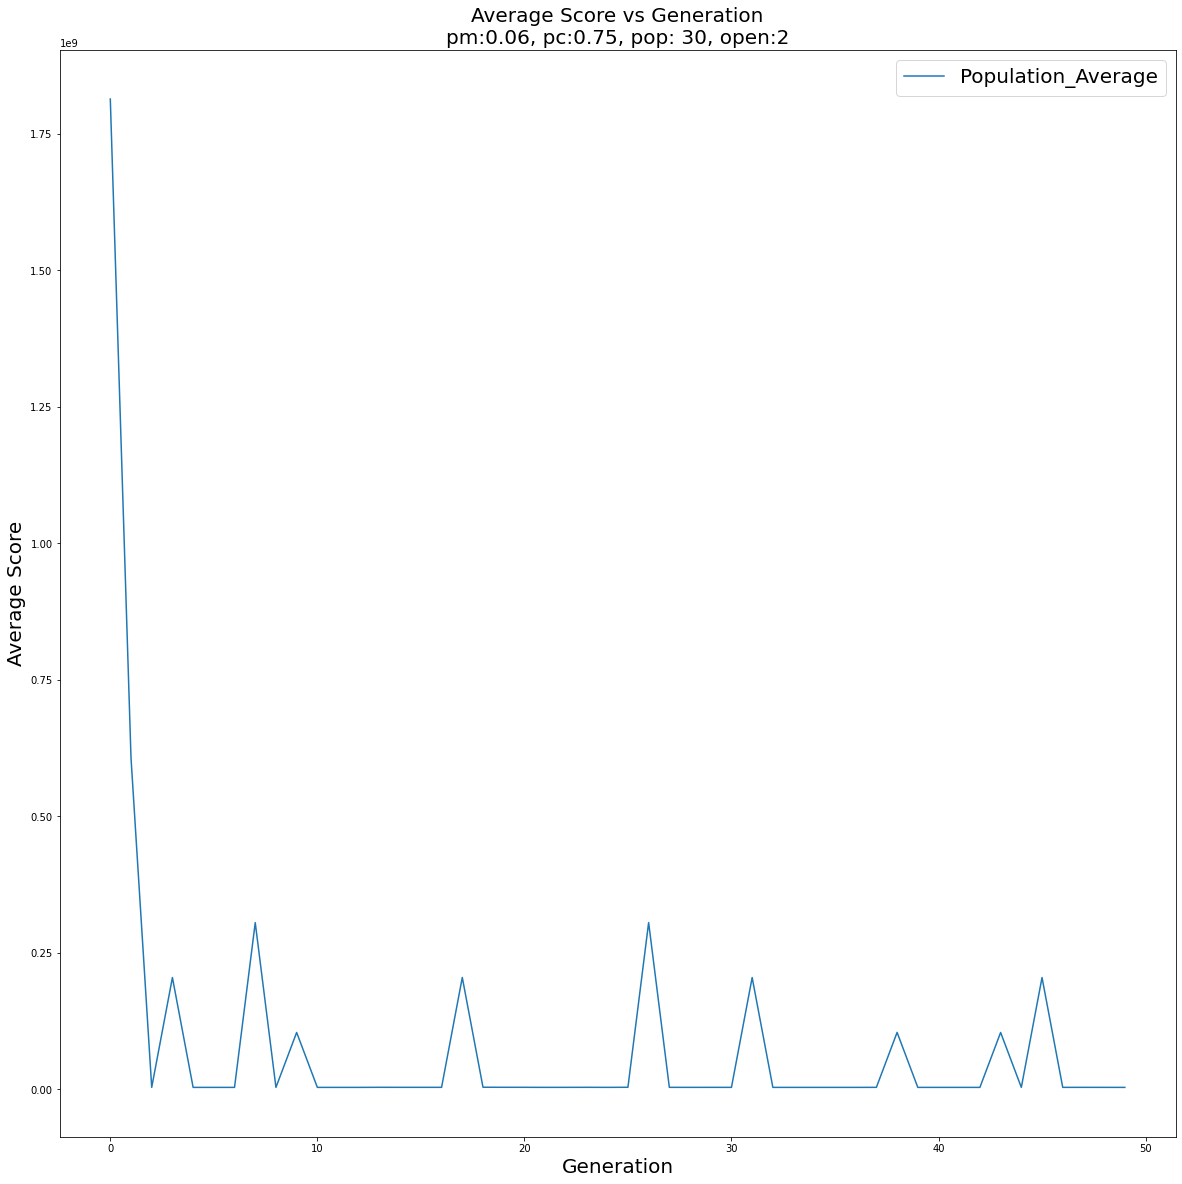

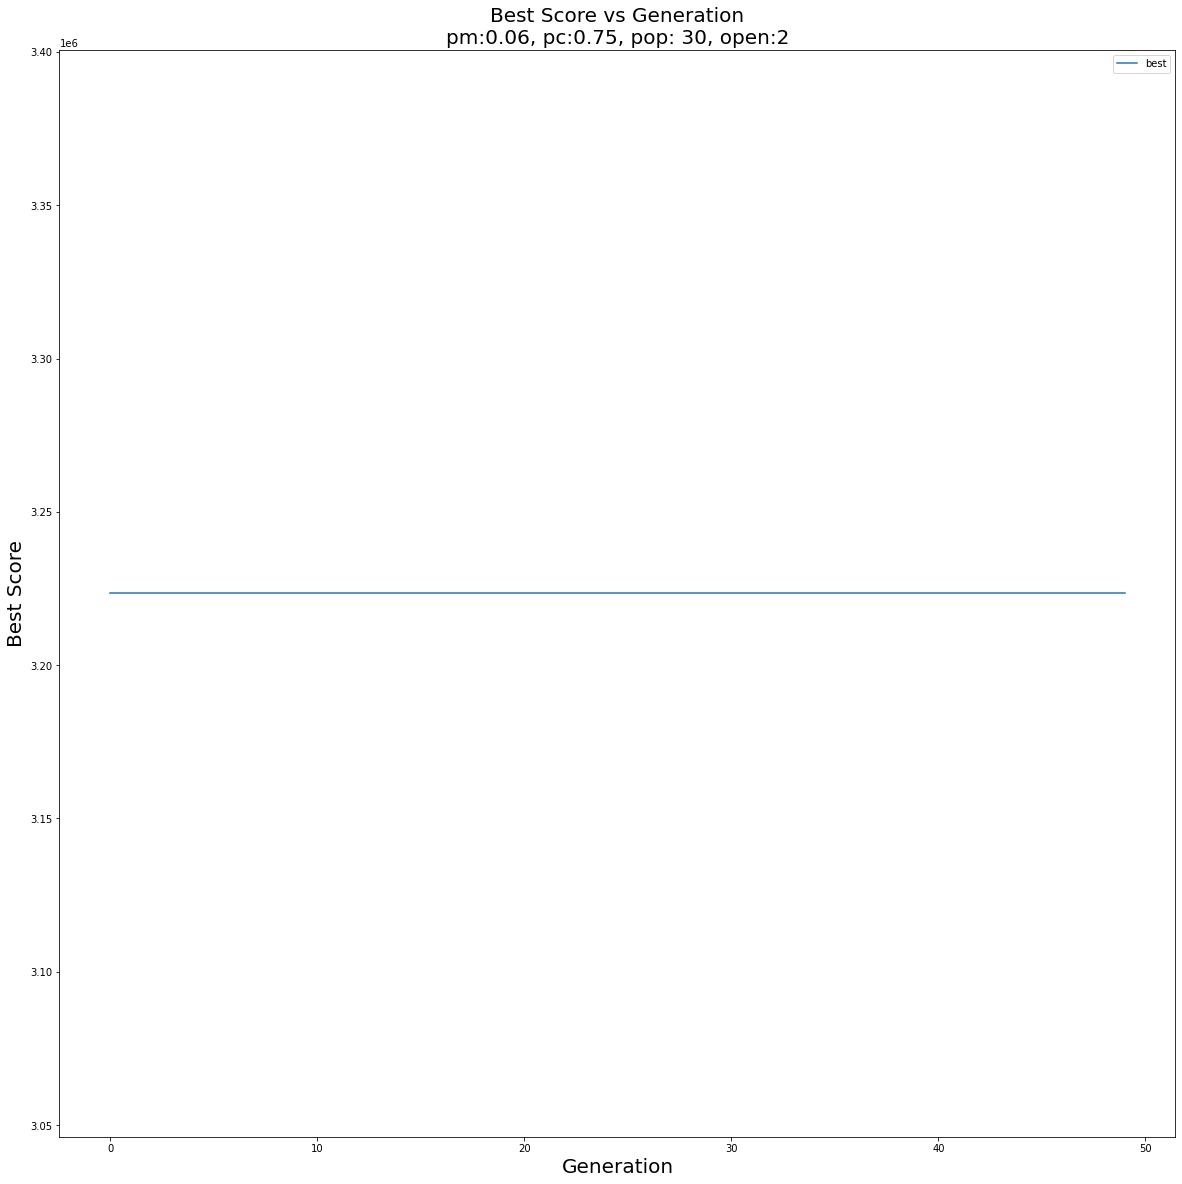


Set up:
pm: 0.06-pc: 0.75-oneprob: None-Nopen: 2-pop: 30
Average Best score: 3223455.0959999994 from 1 runs
Best Solution :[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0.]


In [14]:
# visualize their solution learning ability
gaoptmzr.show_results(figsize=(20, 20),
                     fontdict={"size":20}, prop={"size":20},
                    )



# Display results log:
for Key in hp_dict:
    print("\nSet up:\n{}".format(Key))
    print("Average Best score: {} from {} runs".format(np.mean(hp_dict[Key]['best_score']), len(hp_dict[Key]['best_score'])))
    print("Best Solution :{}".format(hp_dict[Key]['soln'][0])) 


In [15]:
# Testing setting 1 by index
ze = np.zeros(10)
ze[np.random.default_rng().choice([1, 5, 4, 9, 2, 6, 3, 7, 8, 0], 6, replace=False)] = 1
ze

array([1., 0., 1., 0., 1., 1., 1., 0., 0., 1.])

# Solution Testing Cell
> copy the reportes best solution into the list of list solns and run the cell to make sure the 
> reported scores match up to the calculated ones. This basically is a sanity check

In [16]:
# Test a given solution to make sure things are working as expected
solns = [gaoptmzr.best_solution]

# reported 33305047.277000, 
# 17294281.508
#  1772081 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

scores = gaoptmzr.gaoptmzr.solver.score_population(solns, penalize_budget=True)
idx=0
indices = []
for i in solns[0]: 
    if i == 1:
        print("Solution Id {}".format(idx))
        indices.append(idx)
    idx += 1
print(gaoptmzr.gaoptmzr.solver.dgset.assignments)

facc = list()
for k in gaoptmzr.gaoptmzr.solver.dgset.assignments:
    facc += gaoptmzr.gaoptmzr.solver.dgset.assignments[k]
    
print("Assigned Facilities: {}".format(sorted(list(set(facc)))))
print("Calculated: ",scores)
print('Best Solution: ', list(gaoptmzr.best_solution))
print("Investment: ", gaoptmzr.gaoptmzr.solver.investment_d)
print("True Cost: ", gaoptmzr.gaoptmzr.solver.truecost)
print("Percentage of Demand Met: {:.2f}".format(gaoptmzr.gaoptmzr.solver.nodes.nodes['suppliedPower'].sum()/gaoptmzr.gaoptmzr.solver.nodes.nodes['demand'].sum()))

Solution Id 11
Solution Id 17
{0: [], 1: [], 2: [], 3: [], 4: [], 5: [], 6: [], 7: [], 8: [], 9: [], 10: [], 11: [], 12: [], 13: [], 14: [], 15: [], 16: [], 17: [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24], 18: [], 19: [], 20: [], 21: [], 22: [], 23: [], 24: []}
Assigned Facilities: [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]
Calculated:  {0: 3223455.096}
Best Solution:  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Investment:  {0: 525868.0}
True Cost:  {0: 3223455.096}
Percentage of Demand Met: 0.11


## Low Excess, low for unmet demand, Budget = 1000000
## Assigned Facilities: [0, 5, 6, 7, 8, 17, 18, 19]
## Calculated:  {0: 12812118.405000001}
## Best Solution:  [0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0, 1, 0.0, 0.0, 0.0, 0.0, 0]
## Investment:  {0: 998502.87}
## True Cost:  {0: 12815112.665000001}
## Percentage of Demand Met: 0.21

# #################################################
____________________________________________________________________________________________________________________
## {0: [], 1: [], 2: [], 3: [], 4: [], 5: [], 6: [], 7: [], 8: [], 9: [], 10: [], 11: [], 12: [], 13: [], 14: [], 15: [], 16: [], 17: [], 18: [], 19: [8, 18, 19], 20: [], 21: [], 22: [0, 5, 6, 7, 17], 23: [], 24: []}
## Assigned Facilities: [0, 5, 6, 7, 8, 17, 18, 19]
## Calculated:  {0: 12812118.07}
## Best Solution:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0]
## Investment:  {0: 998502.87}
## True Cost:  {0: 12815112.33}
## Percentage of Demand Met: 0.21

# #######################################################
## {0: [], 1: [], 2: [], 3: [], 4: [], 5: [5, 6], 6: [], 7: [], 8: [], 9: [], 10: [], 11: [], 12: [10], 13: [], 14: [], 15: [], 16: [], 17: [], 18: [], 19: [], 20: [], 21: [], 22: [], 23: [], 24: [0, 7, 8]}
## Assigned Facilities: [0, 5, 6, 7, 8, 10]
## Calculated:  {0: 16613666.193}
## Best Solution:  [0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
## Investment:  {0: 999813.44}
## True Cost:  {0: 16614039.313000001}
## Percentage of Demand Met: 0.21

# Low Excess, low for unmet demand, Budget = 10,000,000
# #################################################
## {0: [], 1: [], 2: [], 3: [], 4: [], 5: [], 6: [5, 6, 7, 10, 11, 16, 19, 20], 7: [], 8: [2, 4, 8], 9: [], 10: [], 11: [], 12: [], 13: [0, 1, 3, 13, 14, 15, 17, 18], 14: [], 15: [], 16: [], 17: [], 18: [], 19: [], 20: [], 21: [], 22: [], 23: [], 24: [9, 12, 21, 22, 23, 24]}
## Assigned Facilities: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]
## Calculated:  {0: 8254237.102000001}
## Best Solution:  [0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
## Investment:  {0: 4205456.8}
## True Cost:  {0: 8254237.102000001}
## Percentage of Demand Met: 1.00

# Low Excess, Mid for unmet demand, Budget = 1000000

# Low Excess, High for unmet demand, Budget = 1000000




In [17]:
# Assigned Facilities: [0, 5, 6, 7, 8, 17, 18, 19]
# Calculated:  {0: 12812118.405000001}
# Best Solution:  [0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0, 1, 0.0, 0.0, 0.0, 0.0, 0]
# Investment:  {0: 998502.87}
# True Cost:  {0: 12815112.665000001}
# Percentage of Demand Met: 0.21

# Low Excess, low for unmet demand, Budget = 5000000

# #################################################################
## {0: [], 1: [], 2: [], 3: [], 4: [], 5: [], 6: [], 7: [], 8: [], 9: [], 10: [], 11: [], 12: [], 13: [0, 1, 3, 6, 7, 8, 10, 11, 13, 17, 19], 14: [], 15: [14, 15, 16, 18], 16: [], 17: [], 18: [], 19: [2, 4], 20: [20], 21: [5, 9, 21], 22: [22, 24], 23: [12, 23], 24: []}
## Assigned Facilities: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]
## Calculated:  {0: 11190248.669}
## Best Solution:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0]
## Investment:  {0: 3351868.83}
## True Cost:  {0: 14486511.009}
## Percentage of Demand Met: 0.82

# #################################################################
## {0: [], 1: [], 2: [], 3: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24], 4: [], 5: [], 6: [], 7: [], 8: [], 9: [], 10: [], 11: [], 12: [], 13: [], 14: [], 15: [], 16: [], 17: [], 18: [], 19: [], 20: [], 21: [], 22: [], 23: [], 24: []}
## Assigned Facilities: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]
## Calculated:  {0: 2958018.511000001}
## Best Solution:  [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
## Investment:  {0: 3777625.7600000002}
## True Cost:  {0: 5402766.991}
## Percentage of Demand Met: 1.00



# Mid Excess, low for unmet demand, Budget = 1000000

# Mid Excess, low for unmet demand, Budget = 1000000

# Mid Excess, low for unmet demand, Budget = 1000000

# Mid Excess, low for unmet demand, Budget = 1000000

In [18]:
facility_df = pd.read_csv(facilities)
DGdist_df = pd.read_csv(Distances)
DG_df = pd.read_csv(DG_FILES)
gaoptmzr.gaoptmzr.solver.dgset.dg_df.loc[indices, :].head()
on_indices = [1, 5, 6, 10, 14, 17, 21, 24]
assignments = {
               1: [1, 3],
               5: [5, 20],
               6: [6],              
               10: [2, 4, 7, 8, 10, 11, 14, 16, 19],       
               13: [0, 13, 15, 18],        
               17: [17], 
               21: [9, 21], 
               22: [], 23: [], 
               24: [12, 22, 23, 24]}
#DG_df
#facility_df
#Penalty_options
DG_df['current_output'] = DG_df['output'].values.tolist()
#DG_df['current_output'] = np.zeros(len(DG_df))
# calculate current_output based on the assignments
sum_inv_x_pwr= 0
# for fid in facility_df.index.tolist():
#     gotit = False
for dgId in assignments:
    print(dgId)
    opt =DG_df.loc[dgId, 'current_output']
    rpwr =DG_df.loc[dgId, 'rated_power']

    invc = DG_df.loc[dgId, 'investment_cost'] * opt
    pwer_left = rpwr - opt
    print(pwer_left)
    print(DG_df.loc[dgId, 'rated_power'] - DG_df.loc[dgId, 'current_output'])
    print(rpwr)
    print()
    for fid in assignments[dgId]:
        if pwer_left > facility_df.loc[fid,'demand']:
            # add this nodes demand to what the dg needs to(is) output(ing)
            DG_df.loc[dgId, 'current_output'] += facility_df.loc[fid, 'demand']
            # set this nodes to be fully supplied
            facility_df.loc[fid, 'suppliedPower'] = facility_df.loc[fid, 'demand']
        else:
            # set this dg to be outputting its max
            DG_df.loc[dgId, 'current_output'] = DG_df.loc[dgId, 'rated_power']
            # This node gets what ever the dg had left to give
            facility_df.loc[fid, 'suppliedPower'] = pwer_left
        # keep track of the total investment cost of DG allocation so we do not exceed budget
        opt =DG_df.loc[dgId, 'current_output']
#         ls


        invc = DG_df.loc[dgId, 'investment_cost'] * opt
        sum_inv_x_pwr +=invc
        # once we have found a suitable DG break the loop and assign for the next facility
        #break
sum_inv_x_pwr= 0
for dgId in assignments:
    opt =DG_df.loc[dgId, 'current_output']
    rpwr =DG_df.loc[dgId, 'rated_power']

    invc = DG_df.loc[dgId, 'investment_cost'] * opt
    sum_inv_x_pwr += invc 
        
        
print(sum_inv_x_pwr)

1
3648752.0
3648752.0
5000000.0

5
729750.0
729750.0
1000000.0

6
729750.0
729750.0
1000000.0

10
3648752.0
3648752.0
5000000.0

13
3648752.0
3648752.0
5000000.0

17
364875.0
364875.0
500000.0

21
729750.0
729750.0
1000000.0

22
729750.0
729750.0
1000000.0

23
729750.0
729750.0
1000000.0

24
729750.0
729750.0
1000000.0

12370981.900000002


In [19]:

list(assignments.keys())


[1, 5, 6, 10, 13, 17, 21, 22, 23, 24]

In [20]:
display(gaoptmzr.gaoptmzr.solver.nodes.nodes)
display(gaoptmzr.gaoptmzr.solver.dgset.dg_df)

,id,demand,penalty,pos-x,pos-y,low,medium,high,type,suppliedPower
0,1,495434,10,35.953747,-83.943975,1.0,5.0,10,Hospital,0.0
1,2,495434,10,35.967477,-83.937751,1.0,5.0,10,Hospital,0.0
2,3,495434,10,36.062503,-83.996649,1.0,5.0,10,Hospital,0.0
3,4,495434,10,35.975097,-83.936355,1.0,5.0,10,Hospital,0.0
4,5,495434,10,35.968580,-83.993414,1.0,5.0,10,Hospital,0.0
5,6,18031,5,35.984883,-83.903327,0.5,2.5,5,FireStation,18031.0
6,7,18031,5,35.986606,-83.932197,0.5,2.5,5,FireStation,18031.0
7,8,18031,5,35.992759,-83.952804,0.5,2.5,5,FireStation,18031.0
8,9,18031,5,35.991716,-84.001613,0.5,2.5,5,FireStation,18031.0
9,10,18031,5,35.935312,-83.869820,0.5,2.5,5,FireStation,18031.0


,id,output,pos-x,pos-y,rated_power,investment_cost,o&m_cost,excess_penetration_cost_LOW,excess_penetration_cost_MEDIUM,excess_penetration_cost_HIGH,costs,current_output,assignments
0,1.0,1351248.0,35.953747,-83.943975,5000000.0,1.36,0.041,0.680,1.36,2.040,0.0,0.0,0.0
1,2.0,1351248.0,35.967477,-83.937751,5000000.0,1.36,0.041,0.680,1.36,2.040,0.0,0.0,0.0
2,3.0,1351248.0,36.062503,-83.996649,5000000.0,1.36,0.041,0.680,1.36,2.040,0.0,0.0,0.0
3,4.0,1351248.0,35.975097,-83.936355,5000000.0,1.36,0.041,0.680,1.36,2.040,0.0,0.0,0.0
4,5.0,1351248.0,35.968580,-83.993414,5000000.0,1.36,0.041,0.680,1.36,2.040,0.0,0.0,0.0
5,6.0,270250.0,35.984883,-83.903327,1000000.0,1.72,0.052,0.860,1.72,2.580,0.0,0.0,0.0
6,7.0,270250.0,35.986606,-83.932197,1000000.0,1.72,0.052,0.860,1.72,2.580,0.0,0.0,0.0
7,8.0,270250.0,35.992759,-83.952804,1000000.0,1.72,0.052,0.860,1.72,2.580,0.0,0.0,0.0
8,9.0,270250.0,35.991716,-84.001613,1000000.0,1.72,0.052,0.860,1.72,2.580,0.0,0.0,0.0
9,10.0,270250.0,35.935312,-83.869820,1000000.0,1.72,0.052,0.860,1.72,2.580,0.0,0.0,0.0


Questions:
    
is alpha: current_output, described output?

# References:

* [Genetic Algorithms: John H. Holland, July 1992, Scientific American](https://www.jstor.org/stable/pdf/24939139.pdf?refreqid=excelsior%3A037d6e486556a59706db6b7fb51c5205)

* [Paper_Microgrid_Sim](https://github.com/ILABUTK/Paper_Microgrid_Sim)
* [Simulation-based_optimization](https://en.wikipedia.org/wiki/Simulation-based_optimization)
* [In Situ Operating Room–Based Simulation: A Review](https://www.sciencedirect.com/science/article/pii/S1931720417300028)